In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np
from astropy.table import Table
from bliss.catalog import convert_nmgy_to_mag
import torch
import matplotlib.pyplot as plt

In [2]:
from case_studies.galaxy_clustering.data_generation.cluster_prior import ClusterPrior
from case_studies.galaxy_clustering.data_generation.background_prior import BackgroundPrior

cluster_prior = ClusterPrior(image_size=1280)
background_prior = BackgroundPrior(image_size=1280)

In [3]:
cluster = cluster_prior.sample_cluster()
background = background_prior.sample_background()
background_fluxes = torch.tensor(np.array(background[["FLUX_G", "FLUX_R", "FLUX_I", "FLUX_Z"]]))
cluster_fluxees = torch.tensor(np.array(cluster[["FLUX_G", "FLUX_R", "FLUX_I", "FLUX_Z"]]))
background_mags = convert_nmgy_to_mag(background_fluxes / 1000)
cluster_mags = convert_nmgy_to_mag(cluster_fluxees / 1000)
background_g_r = background_mags[:,0] / background_mags[:,1]
background_r_i = background_mags[:,1] / background_mags[:,2]
background_i_z = background_mags[:,2] / background_mags[:,3]
background_mags_i = background_mags[:,2]

cluster_g_r = cluster_mags[:,0] / cluster_mags[:,1]
cluster_r_i = cluster_mags[:,1] / cluster_mags[:,2]
cluster_i_z = cluster_mags[:,2] / cluster_mags[:,3]
cluster_mags_i = cluster_mags[:,2]

In [4]:
for i in range(50):
    cluster = cluster_prior.sample_cluster()
    background = background_prior.sample_background()
    background_fluxes = torch.tensor(np.array(background[["FLUX_G", "FLUX_R", "FLUX_I", "FLUX_Z"]]))
    cluster_fluxees = torch.tensor(np.array(cluster[["FLUX_G", "FLUX_R", "FLUX_I", "FLUX_Z"]]))
    background_mags = convert_nmgy_to_mag(background_fluxes / 1000)
    cluster_mags = convert_nmgy_to_mag(cluster_fluxees / 1000)
    new_background_g_r = background_mags[:,0] / background_mags[:,1]
    new_background_r_i = background_mags[:,1] / background_mags[:,2]
    new_background_i_z = background_mags[:,2] / background_mags[:,3]
    new_background_mags_i = background_mags[:,2]

    new_cluster_g_r = cluster_mags[:,0] / cluster_mags[:,1]
    new_cluster_r_i = cluster_mags[:,1] / cluster_mags[:,2]
    new_cluster_i_z = cluster_mags[:,2] / cluster_mags[:,3]
    new_cluster_mags_i = cluster_mags[:,2]

    background_g_r = torch.cat((background_g_r, new_background_g_r))
    background_r_i = torch.cat((background_r_i, new_background_r_i))
    background_i_z = torch.cat((background_i_z, new_background_i_z))
    background_mags_i = torch.cat((background_mags_i, new_background_mags_i))

    cluster_g_r = torch.cat((cluster_g_r, new_cluster_g_r))
    cluster_r_i = torch.cat((cluster_r_i, new_cluster_r_i))
    cluster_i_z = torch.cat((cluster_i_z, new_cluster_i_z))
    cluster_mags_i = torch.cat((cluster_mags_i, new_cluster_mags_i))

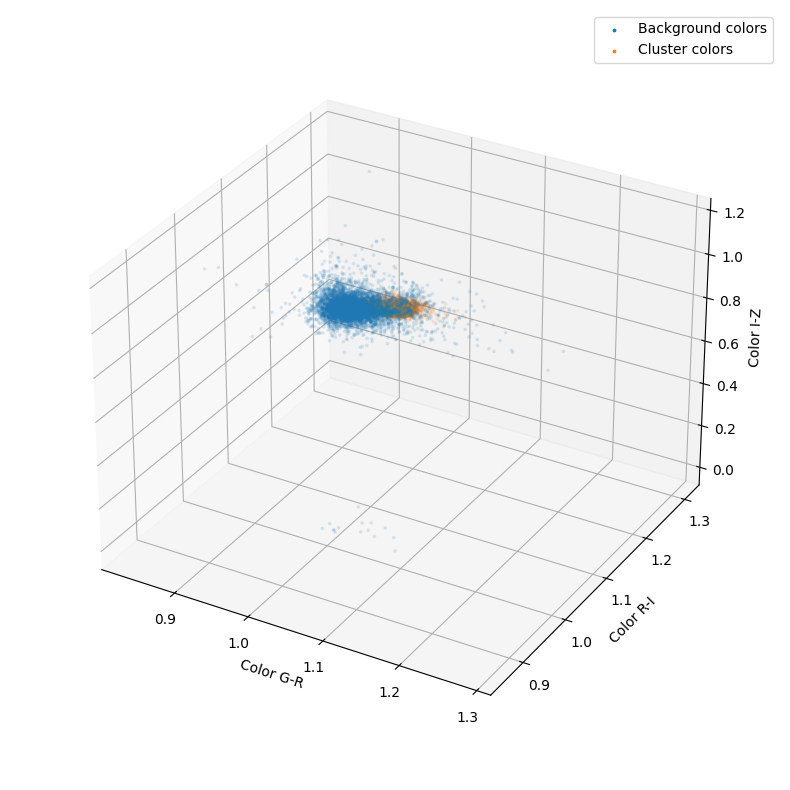

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.9)
ax.scatter(background_g_r, background_r_i, background_i_z, label='Background colors', alpha=0.1, s=3)
ax.scatter(cluster_g_r, cluster_r_i, cluster_i_z, label='Cluster colors', alpha=0.1, s=3)
ax.set_xlabel("Color G-R")
ax.set_ylabel("Color R-I")
ax.set_zlabel("Color I-Z")
leg = ax.legend()
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.show()

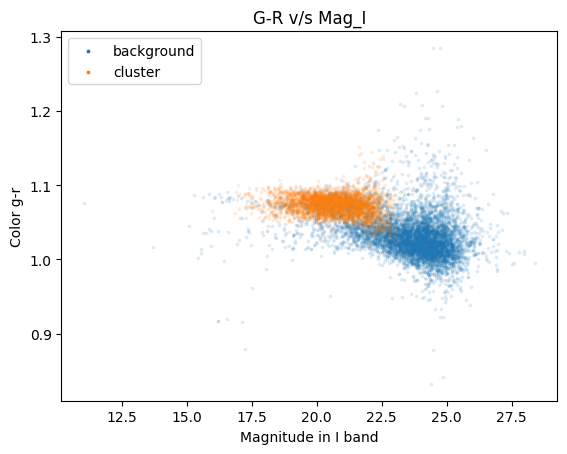

In [10]:
bg_bad_indices = torch.logical_or(torch.isnan(background_g_r), torch.isinf(background_g_r))
bg_bad_indices = torch.logical_or(bg_bad_indices, (background_g_r == 0))
bg_bad_indices = torch.logical_or(torch.isinf(background_mags_i), bg_bad_indices)

cluster_bad_indices = torch.logical_or(torch.isnan(cluster_g_r), torch.isinf(cluster_g_r))
cluster_bad_indices = torch.logical_or(cluster_bad_indices, (cluster_g_r == 0))
cluster_bad_indices = torch.logical_or(torch.isinf(cluster_mags_i), cluster_bad_indices)
ax = plt.gca()
#ax.set_xlim([12, 30])
#ax.set_ylim([0.8, 1.5])
ax.set_xlabel("Magnitude in I band")
ax.set_ylabel("Color g-r")
ax.set_title("G-R v/s Mag_I")
plt.scatter(background_mags_i[~bg_bad_indices], background_g_r[~bg_bad_indices], alpha=0.1, s=3, label='background')
plt.scatter(cluster_mags_i[~cluster_bad_indices], cluster_g_r[~cluster_bad_indices], alpha=0.1, s=3, label='cluster')
leg = ax.legend()
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.show()

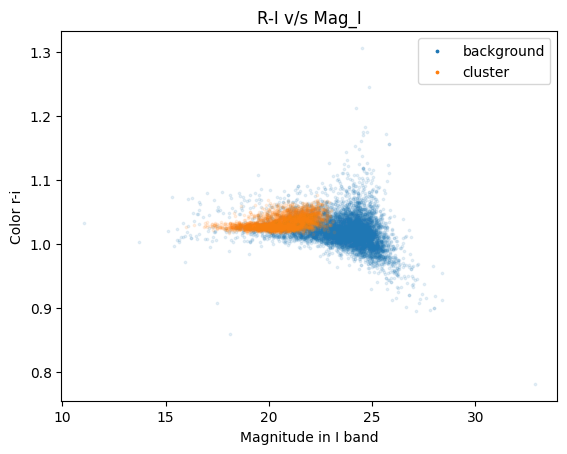

In [11]:
bg_bad_indices = torch.logical_or(torch.isnan(background_r_i), torch.isinf(background_r_i))
bg_bad_indices = torch.logical_or(bg_bad_indices, (background_r_i == 0))
bg_bad_indices = torch.logical_or(torch.isinf(background_mags_i), bg_bad_indices)

cluster_bad_indices = torch.logical_or(torch.isnan(cluster_r_i), torch.isinf(cluster_r_i))
cluster_bad_indices = torch.logical_or(cluster_bad_indices, (cluster_r_i == 0))
cluster_bad_indices = torch.logical_or(torch.isinf(cluster_mags_i), cluster_bad_indices)
ax = plt.gca()
#ax.set_xlim([12, 30])
#ax.set_ylim([0.8, 1.5])
ax.set_xlabel("Magnitude in I band")
ax.set_ylabel("Color r-i")
ax.set_title("R-I v/s Mag_I")
plt.scatter(background_mags_i[~bg_bad_indices], background_r_i[~bg_bad_indices], alpha=0.1, s=3, label='background')
plt.scatter(cluster_mags_i[~cluster_bad_indices], cluster_r_i[~cluster_bad_indices], alpha=0.1, s=3, label='cluster')
leg = ax.legend()
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.show()

In [12]:
CLUSTER_CATALOG_PATH = "redmapper_sva1-expanded_public_v6.3_members.fits"
full_cluster_df = Table.read(CLUSTER_CATALOG_PATH).to_pandas()
full_cluster_df

,ID,RA,DEC,R,P,P_FREE,THETA_I,THETA_R,MAG_AUTO_G,MAGERR_AUTO_G,MAG_AUTO_R,MAGERR_AUTO_R,MAG_AUTO_I,MAGERR_AUTO_I,MAG_AUTO_Z,MAGERR_AUTO_Z,Z_SPEC,COADD_OBJECTS_ID
0,1,104.759602,-55.903158,0.868126,0.783947,1.0,1.000000,1.000000,21.949570,0.021828,20.347677,0.005885,19.803492,0.009052,19.489954,0.010690,-1.0,2924102426
1,1,104.804707,-55.886614,1.203799,0.032133,1.0,1.000000,0.694302,21.080441,0.009810,19.955923,0.004091,19.536043,0.007742,19.330839,0.009808,-1.0,2924104213
2,1,104.779776,-55.885828,1.086250,0.855959,1.0,1.000000,0.997875,22.052946,0.020068,20.547306,0.005846,20.020580,0.009085,19.715313,0.010825,-1.0,2924104247
3,1,104.821770,-55.883279,1.312433,0.780496,1.0,1.000000,0.047996,21.168688,0.015462,19.707525,0.004792,19.179884,0.008525,18.859488,0.009843,-1.0,2924104740
4,1,104.811481,-55.872320,1.334219,0.622183,1.0,1.000000,0.017850,21.123981,0.021484,19.915541,0.008251,19.505432,0.015854,19.218428,0.018839,-1.0,2924105979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90674,9058,67.502392,-58.370693,0.328518,0.508214,1.0,0.999999,1.000000,25.143179,0.226469,23.788034,0.076743,22.617744,0.048809,22.279425,0.067014,-1.0,2945499429
90675,9058,67.512681,-58.370300,0.416753,0.050354,1.0,0.999373,1.000000,24.359793,0.133894,23.429205,0.066992,22.679384,0.062688,22.327967,0.084922,-1.0,2945499464
90676,9058,67.515461,-58.368211,0.461415,0.138046,1.0,1.000000,1.000000,24.519791,0.117520,23.343904,0.049114,22.529673,0.041396,22.140692,0.052552,-1.0,2945499645
90677,9058,67.504254,-58.360906,0.479286,0.072485,1.0,1.000000,1.000000,23.716101,0.067762,22.338913,0.022719,21.479088,0.019162,21.159414,0.025995,-1.0,2945503332


In [13]:
full_cluster_mags_i = full_cluster_df["MAG_AUTO_I"]
full_cluster_g_r = full_cluster_df["MAG_AUTO_G"] / full_cluster_df["MAG_AUTO_R"]
full_cluster_r_i = full_cluster_df["MAG_AUTO_R"] / full_cluster_df["MAG_AUTO_I"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


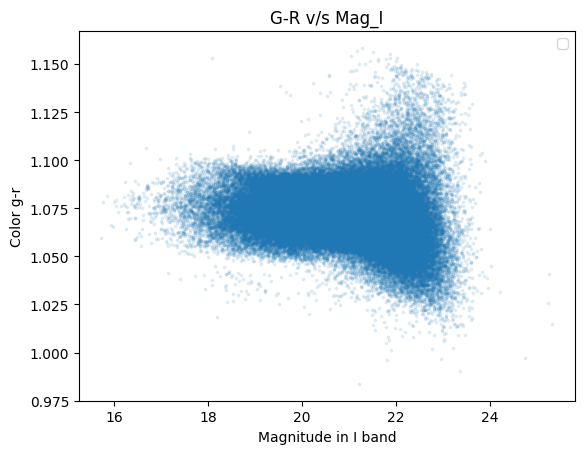

In [18]:
ax = plt.gca()
#ax.set_xlim([12, 30])
#ax.set_ylim([0.8, 1.5])
ax.set_xlabel("Magnitude in I band")
ax.set_ylabel("Color g-r")
ax.set_title("G-R v/s Mag_I")
plt.scatter(full_cluster_mags_i, full_cluster_g_r, alpha=0.1, s=3)
leg = ax.legend()
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.show()

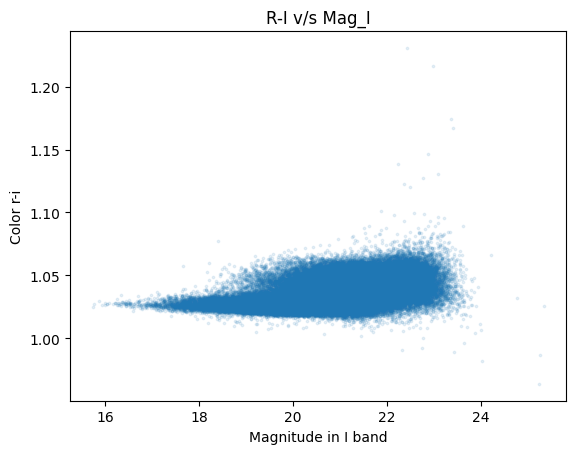

In [17]:
ax = plt.gca()
#ax.set_xlim([12, 30])
#ax.set_ylim([0.8, 1.5])
ax.set_xlabel("Magnitude in I band")
ax.set_ylabel("Color r-i")
ax.set_title("R-I v/s Mag_I")
plt.scatter(full_cluster_mags_i, full_cluster_r_i, alpha=0.1, s=3)
plt.show()

In [26]:
redshift_cluster = full_cluster_df[full_cluster_df["Z_SPEC"] > 0]

In [30]:
redshift_z = redshift_cluster["Z_SPEC"]
redshift_g_r = redshift_cluster["MAG_AUTO_G"] / redshift_cluster["MAG_AUTO_R"]
redshift_r_i = redshift_cluster["MAG_AUTO_R"] / redshift_cluster["MAG_AUTO_I"]

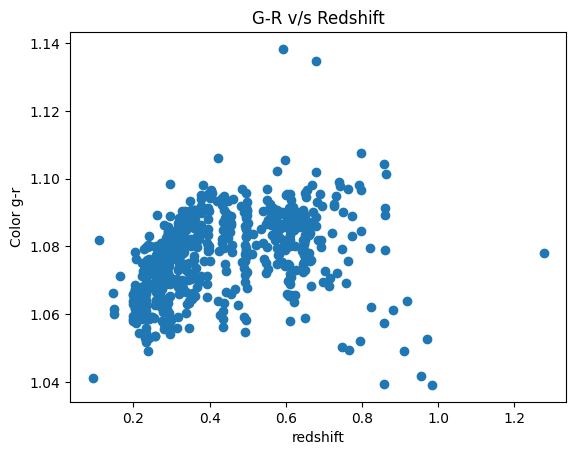

In [36]:
ax = plt.gca()
#ax.set_xlim([12, 30])
#ax.set_ylim([0.8, 1.5])
ax.set_xlabel("redshift")
ax.set_ylabel("Color g-r")
ax.set_title("G-R v/s Redshift")
plt.scatter(redshift_z,redshift_g_r)
plt.show()

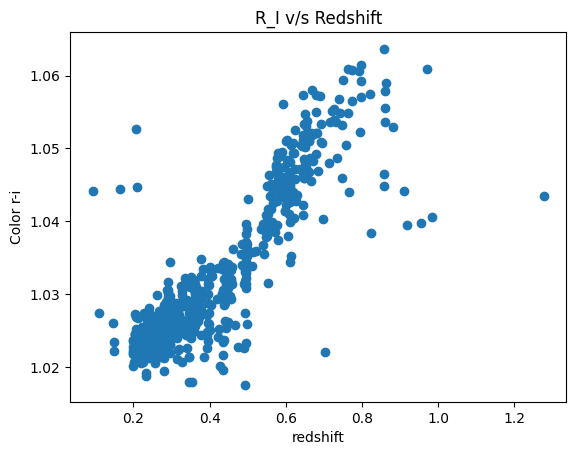

In [37]:
ax = plt.gca()
#ax.set_xlim([12, 30])
#ax.set_ylim([0.8, 1.5])
ax.set_xlabel("redshift")
ax.set_ylabel("Color r-i")
ax.set_title("R_I v/s Redshift")
plt.scatter(redshift_z,redshift_r_i)
plt.show()